# Imports 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

# Load Datas 

In [3]:
df = pd.read_csv('cr7.csv')

In [4]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,21/22,Premier League,37,4/28/22,H,Manchester United,Chelsea FC,1:01,CF,62,1:01,Right-footed shot,Nemanja MatiÄ‡
697,21/22,Premier League,35,05-02-22,H,Manchester United,Brentford FC,3:00,CF,61,2:00,Penalty,NaN
698,22/23,Europa League,Group Stage,9/15/22,A,Manchester United,FC Sheriff,0:02,CF,39,0:02,Penalty,NaN
699,22/23,Premier League,10,10/9/22,A,Manchester United,Everton FC,1:2,NaN,44,1:2,Counter attack goal,Casemiro


# Dtypes

In [5]:
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# Describe Datas 

In [7]:
df.describe()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,701,701,701,701,701,701,701,701,643,701,701,686,459
unique,21,16,52,464,2,4,125,53,5,106,37,11,86
top,14/15,LaLiga,Group Stage,2015-09-12 00:00:00,H,Real Madrid,Sevilla FC,3:00,LW,90,1:00,Right-footed shot,Karim Benzema
freq,61,311,75,5,403,450,27,49,356,17,111,251,44
first,NaN,NaN,NaN,2002-10-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-10-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         242
dtype: int64

In [9]:
for col in df.columns:
    perc = df[[col]].isna().mean()
    print(f'{col}:{round(perc*100)}%')
    print(' ')

Season:Season    0.0
dtype: float64%
 
Competition:Competition    0.0
dtype: float64%
 
Matchday:Matchday    0.0
dtype: float64%
 
Date:Date    0.0
dtype: float64%
 
Venue:Venue    0.0
dtype: float64%
 
Club:Club    0.0
dtype: float64%
 
Opponent:Opponent    0.0
dtype: float64%
 
Result:Result    0.0
dtype: float64%
 
Playing_Position:Playing_Position    8.0
dtype: float64%
 
Minute:Minute    0.0
dtype: float64%
 
At_score:At_score    0.0
dtype: float64%
 
Type:Type    2.0
dtype: float64%
 
Goal_assist:Goal_assist    35.0
dtype: float64%
 


In [10]:
df.dropna(inplace=True)

# Load Datas 

In [11]:
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
1,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
10,03/04,FA Cup,Final,2004-05-22,H,Manchester United,Millwall FC,3:00,RW,44,1:00,Header,Gary Neville
14,04/05,Premier League,25,2005-02-01,A,Manchester United,Arsenal FC,2:04,RW,54,2:02,Left-footed shot,Ryan Giggs
15,04/05,Premier League,25,2005-02-01,A,Manchester United,Arsenal FC,2:04,RW,58,2:03,Tap-in,Ryan Giggs
19,04/05,FA Cup,Semi-Finals,2005-04-17,A,Manchester United,Newcastle United,1:04,RW,76,1:04,Right-footed shot,Ruud van Nistelrooy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,21/22,Premier League,29,2022-03-12,H,Manchester United,Tottenham Hotspur,3:02,CF,81,3:02,Header,Alex Telles
692,21/22,Premier League,33,2022-04-16,H,Manchester United,Norwich City,3:02,CF,7,1:00,Right-footed shot,Anthony Elanga
693,21/22,Premier League,33,2022-04-16,H,Manchester United,Norwich City,3:02,CF,32,2:00,Header,Alex Telles
695,21/22,Premier League,34,2022-04-23,A,Manchester United,Arsenal FC,3:01,CF,34,2:01,Left-footed shot,Nemanja MatiÄ‡


In [12]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,20
Competition,12
Matchday,47
Date,309
Venue,2
Club,4
Opponent,101
Result,49
Playing_Position,5
Minute,101


In [13]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,420,20,14/15,44
Competition,420,12,LaLiga,200
Matchday,420,47,Group Stage,49
Venue,420,2,H,240
Club,420,4,Real Madrid,301
Opponent,420,101,Sevilla FC,19
Result,420,49,3:00,31
Playing_Position,420,5,LW,238
Minute,420,101,70,10
At_score,420,35,1:00,68


# graphics 

In [14]:

px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [15]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,200
UEFA Champions League,102
Serie A,48
Premier League,37
Copa del Rey,15
FIFA Club World Cup,5
FA Cup,4
Supercopa,4
UEFA Super Cup,2
Liga Portugal,1


In [16]:

px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

In [17]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

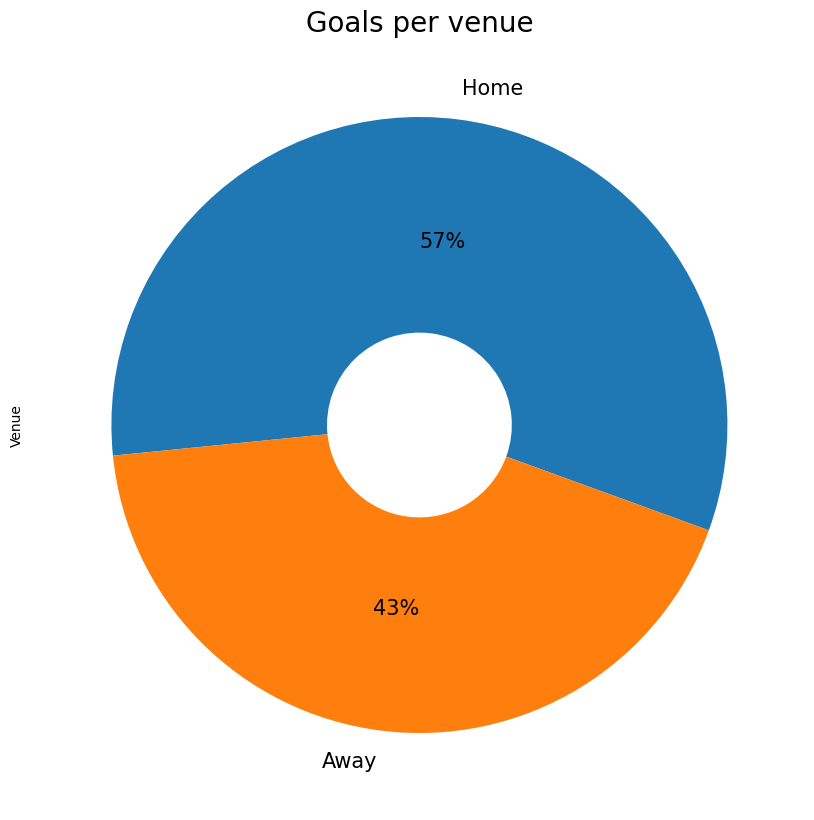

In [18]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [19]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

In [21]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

Text(0.5, 1.0, 'Goals per Game Minute (1-23)')

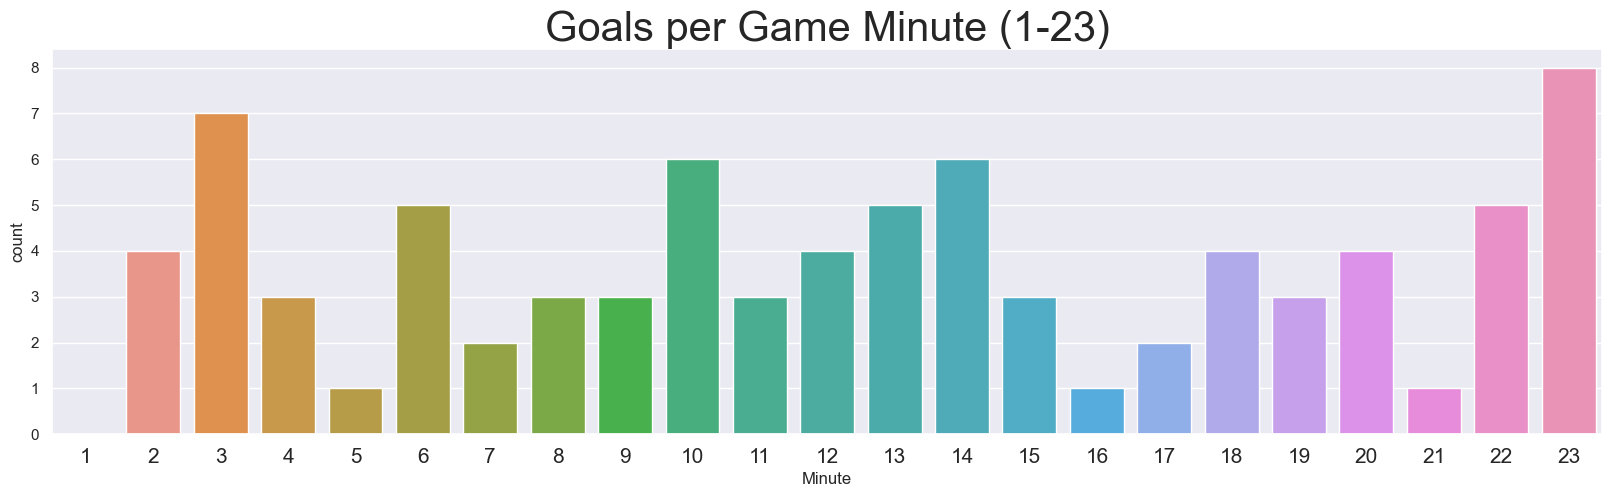

In [22]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (24-First Half Extra time)')

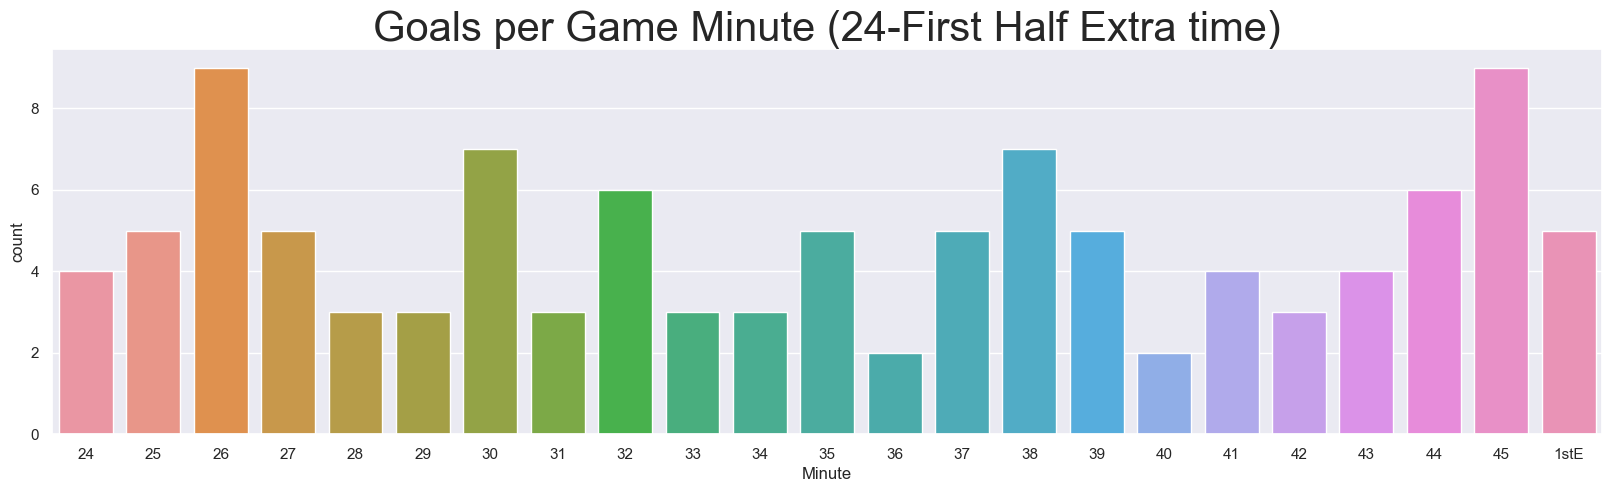

In [23]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-First Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (46-68)')

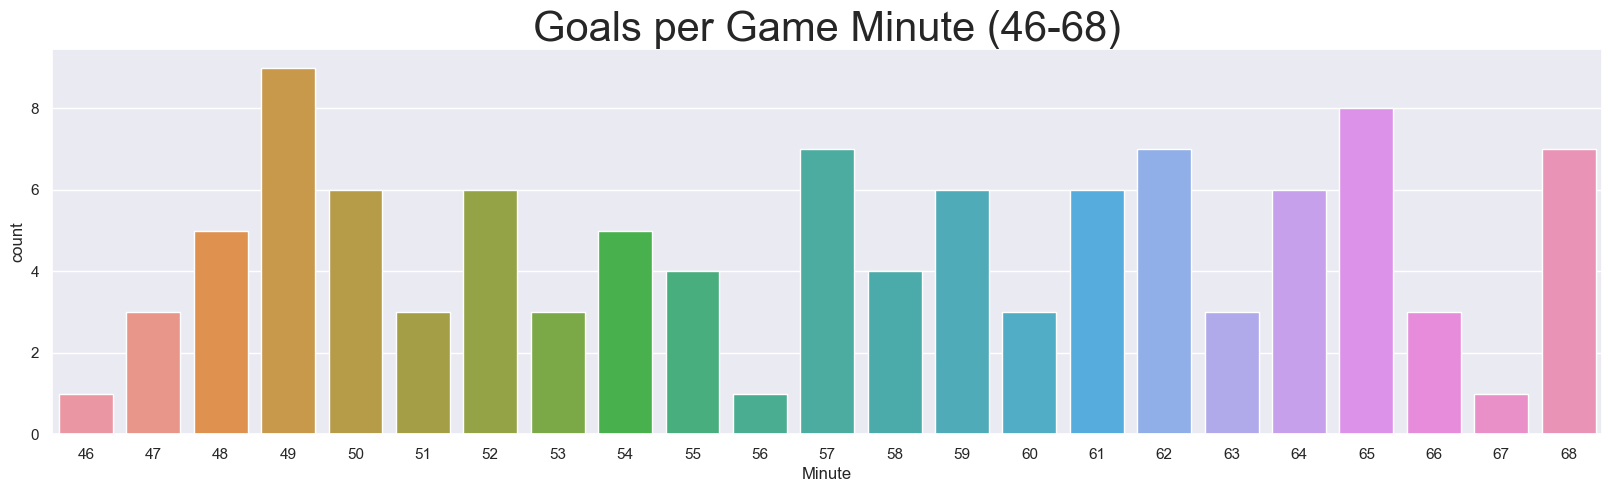

In [24]:

p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute 69- 2nd Half Extra time)')

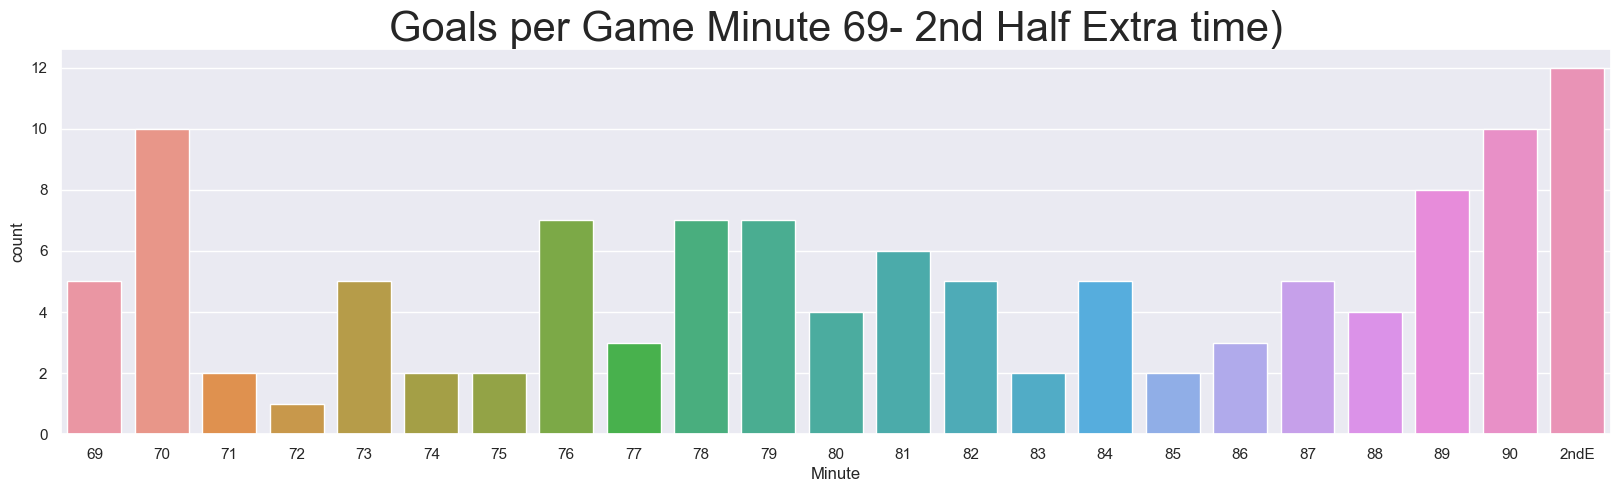

In [25]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute 69- 2nd Half Extra time)",fontsize=30)

Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

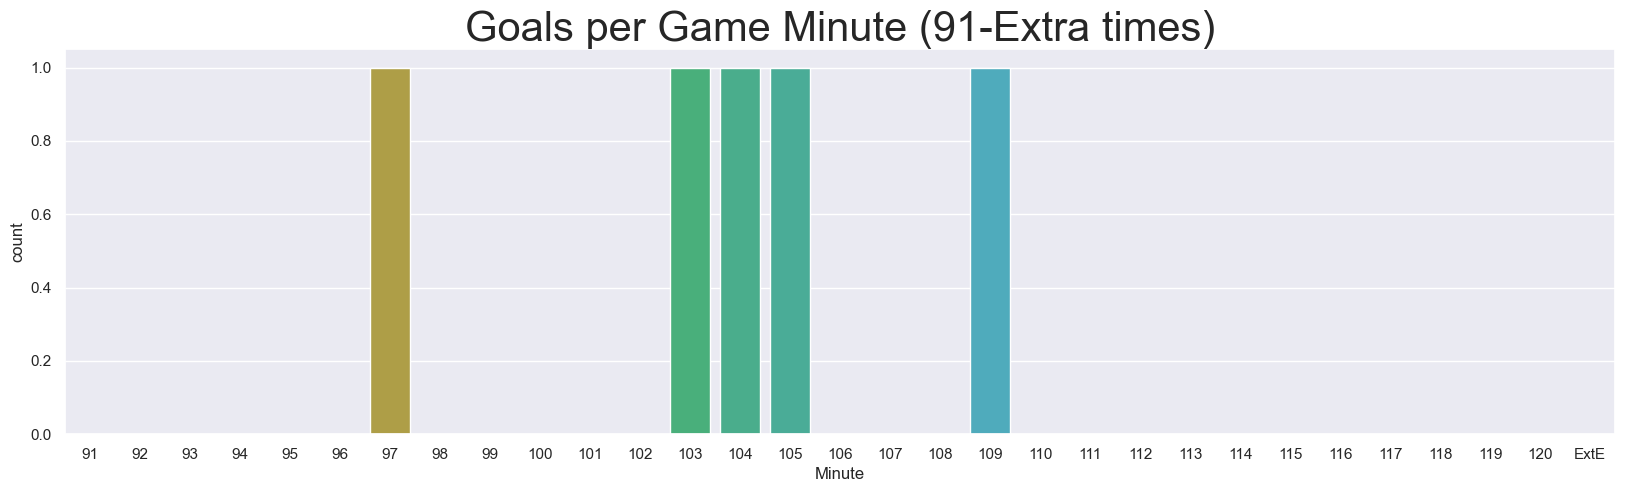

In [26]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=30)

# Opponent favorite

<BarContainer object of 1 artists>

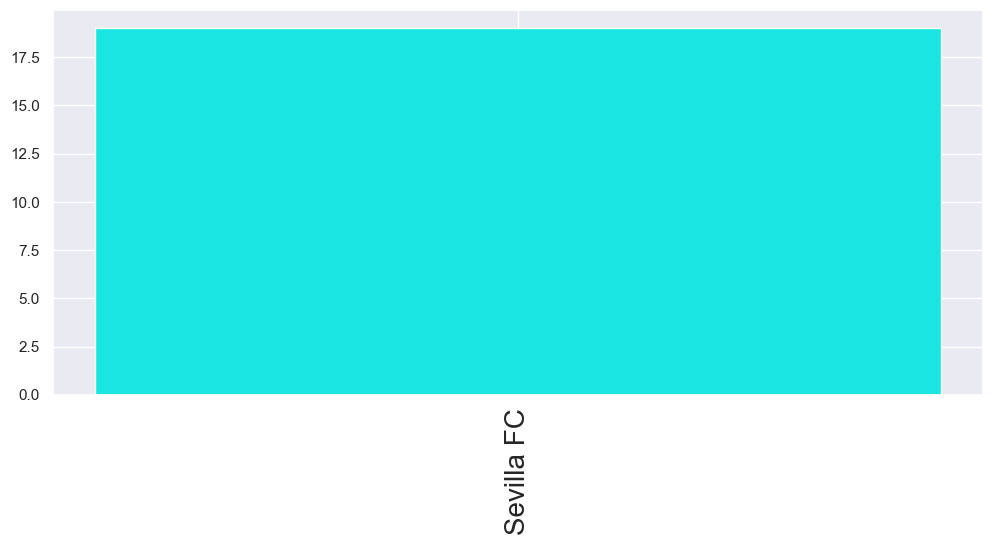

In [28]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

In [29]:
mins=list(map(str, df.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df['Goal_assist']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

Text(0.5, 1.0, 'Goals Assisted by')

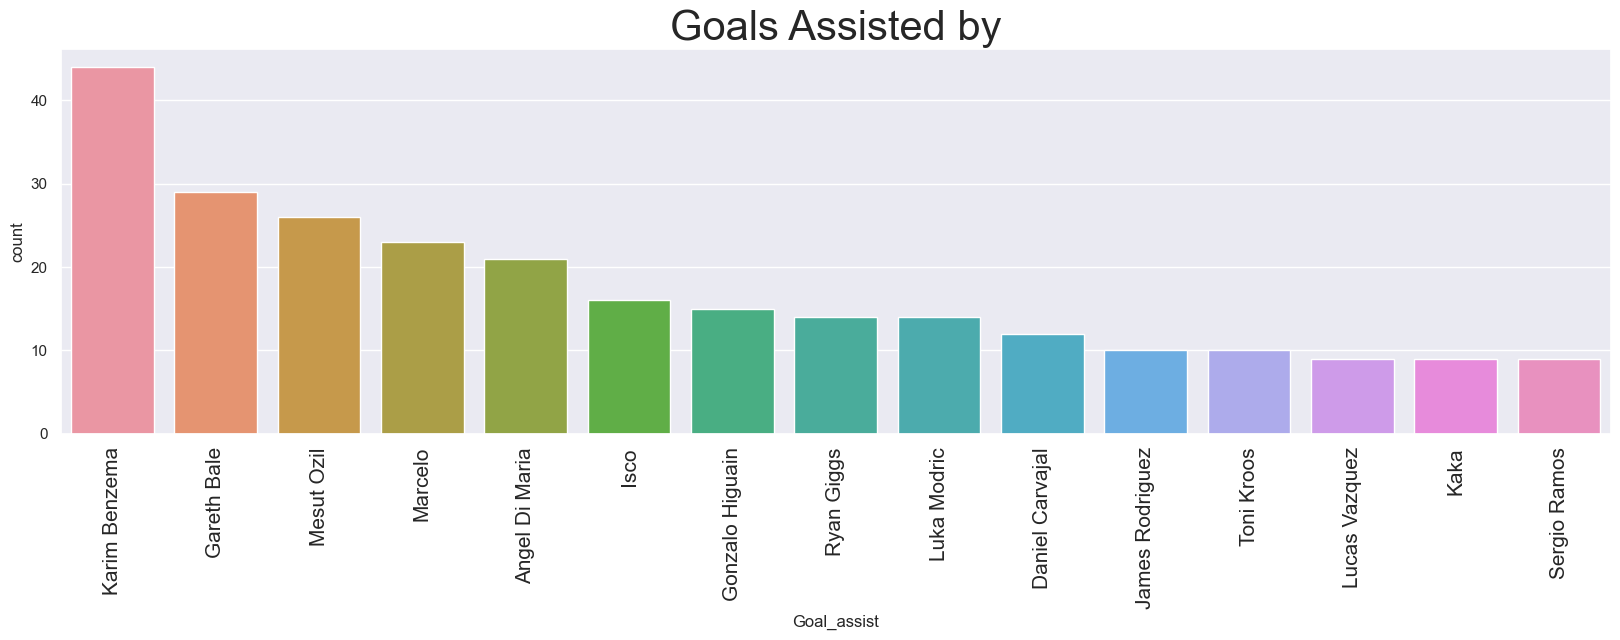

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins1)
p.axes.set_title("Goals Assisted by",fontsize=30)